                                        APPLIANCES ENERGY DATA BUILDINGS
The purpose of this project is to train the dataset to built a model that will predict the Appliances energy data of a building 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='white')
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv("energydata_complete.csv")

In [2]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
# check the number of rows and features of the datasets
df.shape

(19735, 29)

In [4]:
# check for missing values in the datasets
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
# let check the type of data in the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
# let check the name of the columns of the datasets
col = df.columns
print(col)

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


VISUALIZATION OF THE DATA

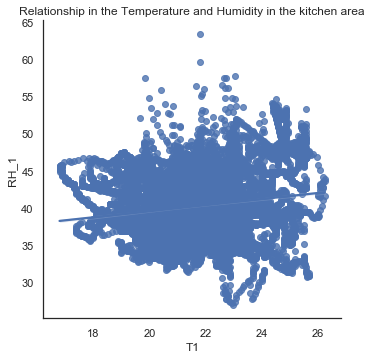

In [7]:
# Let check the relationship of Temperature in kitchen area, in Celsius and Humidity in kitchen area, in %
sns.lmplot(x="T1", y="RH_1", data=df)
plt.title('Relationship in the Temperature and Humidity in the kitchen area')
plt.show()

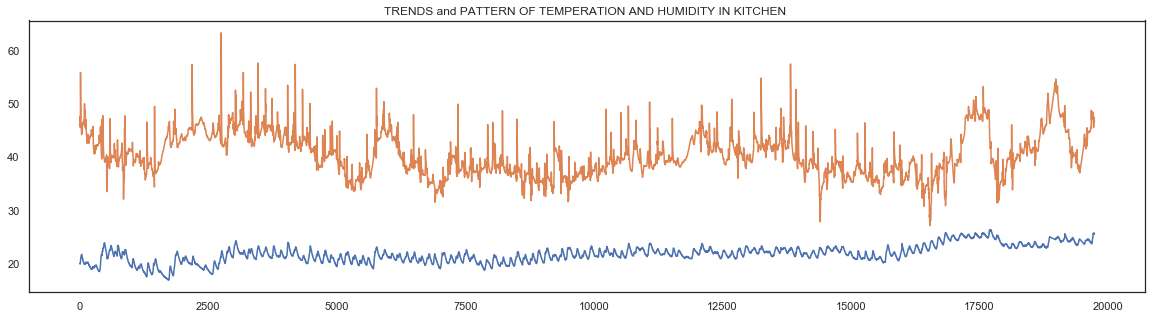

In [8]:
df.T1.plot(figsize=(20,5), title = 'T1 ')
df.RH_1.plot(figsize=(20,5), title = 'RH_1')
plt.title("TRENDS and PATTERN OF TEMPERATION AND HUMIDITY IN KITCHEN ")
plt.show()

<Figure size 1440x720 with 0 Axes>

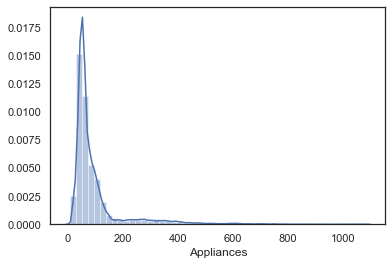

In [18]:
# Let check the normal distribution of Appliances
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show();
sns.distplot(df['Appliances'])

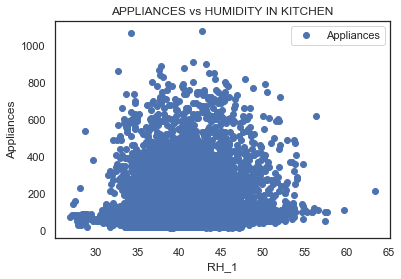

In [17]:
df.plot(x = 'RH_1', y = 'Appliances', style ='o')
plt.title('APPLIANCES vs HUMIDITY IN KITCHEN')
plt.xlabel('RH_1')
plt.ylabel('Appliances')
plt.show()

C:\Users\MERCYFULL GOD\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(*args, **kw)>

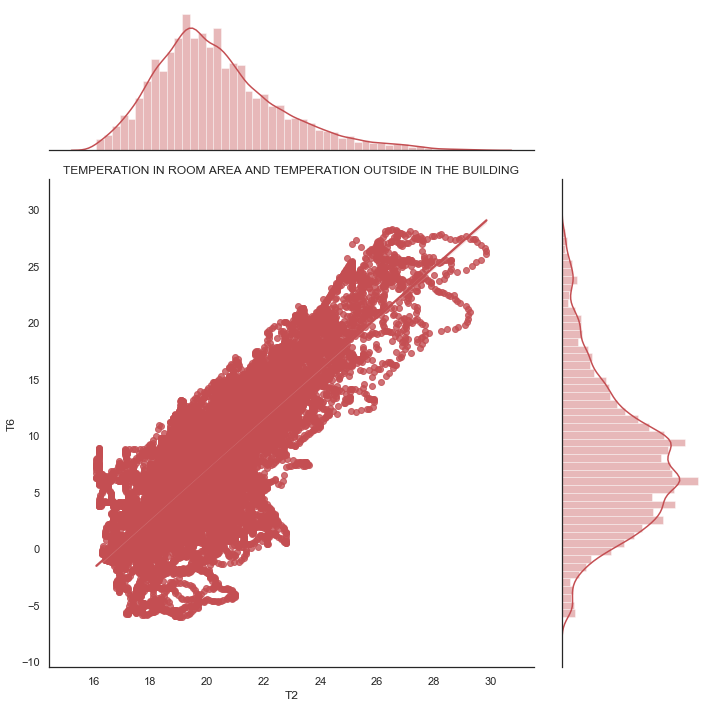

In [19]:

sns.jointplot(df.loc[: ,'T2'], df.loc[: ,'T6'], kind='regg', color='r', size=10, ratio=3, data=df)
plt.title('TEMPERATION IN ROOM AREA AND TEMPERATION OUTSIDE IN THE BUILDING')
plt.show

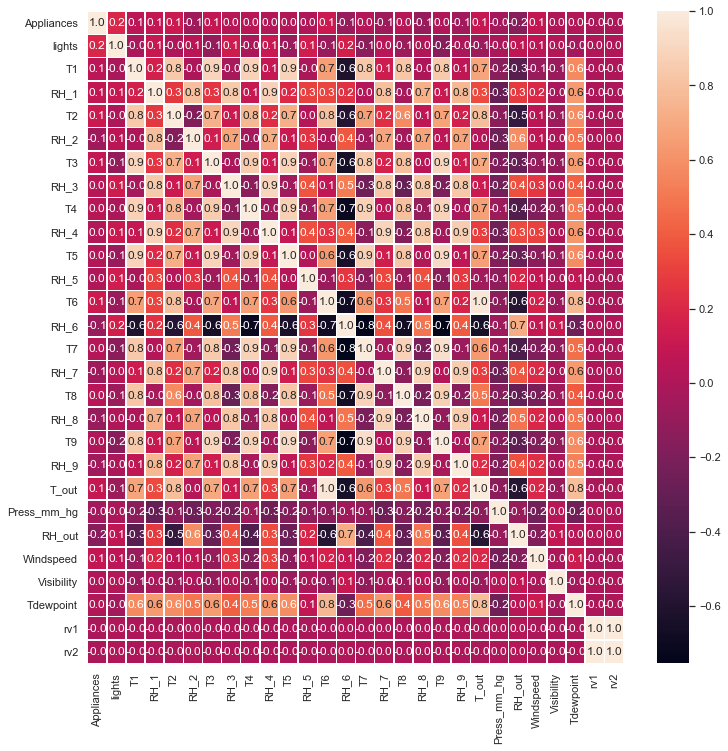

In [22]:
# let check the correlation of all the features
f, ax =plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot =True, linewidth =0.5, fmt='0.1f', ax=ax)

In [23]:
# let check the summary statistics of the datasets
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [24]:
# let check the correlation of the datasets
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [25]:
# let normalised the dataset to a common scale using MinMaxScaler
df = df.drop(columns =['date', 'lights'])
scaler = MinMaxScaler()
normalised = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X = normalised.drop(columns=['Appliances',])
y = normalised['Appliances']

In [26]:
# Let split the dataset in to train and test
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.3,random_state=1)
lr_model = LinearRegression()
# fit the model to the train dataset
lr_model.fit(train_x, train_y)
# predict with the model
y_pred = lr_model.predict(test_x)
# Obtain Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(mae)

0.05007752457961437


In [27]:
# Calculate the Residual Sum Square (RSS)
rss = np.sum(np.square(test_y - y_pred))
print(rss)

46.096679946571285


In [28]:
# Calculate the Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(rmse)

0.08823426919393443


In [29]:
# Calculate the RSquared
r2 = r2_score(test_y, y_pred)
print(r2)

0.15646646512898466


In [30]:
# Let split the dataset in to train and test
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.3,random_state=1)
las_model = Lasso(alpha=0.001)
# fit the model to the train dataset
las_model.fit(train_x, train_y)
# predict with the model
y_pred = las_model.predict(test_x)
# Obtain Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(mae)

0.0558602384317825


In [31]:
# Calculate the Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(rmse)

0.09487096515399372


In [32]:
# Let split the dataset in to train and test
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.3,random_state=1)
rid_model = Ridge(alpha=0.1)
# fit the model to the train dataset
rid_model.fit(train_x, train_y)
# predict with the model
y_pred = rid_model.predict(test_x)
# Obtain Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(mae)

0.050059349166107964


PENALIZATION METHOD

1 Ridge Regression

In [33]:
rid_model = Ridge(alpha=0.4)
# fit the model to the train dataset
rid_model.fit(train_x, train_y)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

2 Feature Selection and Lasso Regression

In [34]:
las_model = Lasso(alpha=0.001)
# fit the model to the train dataset
las_model.fit(train_x, train_y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df


In [36]:
linear_model_weights = get_weights_df(lr_model, train_x, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(rid_model, train_x, 'Ridge_Weight')
lasso_weights_df = get_weights_df(las_model, train_x, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [37]:
print(final_weights)

       Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0          RH_2            -0.458176     -0.412703     -0.000000
1         T_out            -0.330375     -0.269159      0.000000
2            T2            -0.249801     -0.214797      0.000084
3            T9            -0.204718     -0.203381     -0.000000
4          RH_8            -0.156534     -0.155889     -0.000000
5        RH_out            -0.076223     -0.052736     -0.047062
6          RH_7            -0.047614     -0.048777     -0.000000
7          RH_9            -0.036034     -0.037753     -0.000000
8           rv2            -0.000350     -0.000354     -0.000000
9           rv1            -0.000350     -0.000354     -0.000000
10  Press_mm_hg             0.004642      0.004387     -0.000000
11           T1             0.005960     -0.009430      0.000000
12   Visibility             0.010992      0.010787      0.000000
13           T7             0.012583      0.012072     -0.000000
14           T5          

HYPERPARAMETER TUNING OF THE BEST MODEL

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
# let hyperparameter tunning of the best model
para_grid = {'alpha':[0.1,1,10,100], 'max_iter':[1,10,100,1000],'selection':['cyclic']}
grid = GridSearchCV(las_model, para_grid, refit=True, verbose=3)
grid.fit(train_x, train_y)
print("Best Grid Validation Score:{:0.2f}".format(grid.best_score_))
print("Best Parameters: ", grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] alpha=0.1, max_iter=1, selection=cyclic .........................
[CV]  alpha=0.1, max_iter=1, selection=cyclic, score=-0.000, total=   0.1s
[CV] alpha=0.1, max_iter=1, selection=cyclic .........................
[CV]  alpha=0.1, max_iter=1, selection=cyclic, score=-0.000, total=   0.0s
[CV] alpha=0.1, max_iter=1, selection=cyclic .........................
[CV]  alpha=0.1, max_iter=1, selection=cyclic, score=-0.000, total=   0.0s
[CV] alpha=0.1, max_iter=1, selection=cyclic .........................
[CV]  alpha=0.1, max_iter=1, selection=cyclic, score=-0.000, total=   0.0s
[CV] alpha=0.1, max_iter=1, selection=cyclic .........................
[CV]  alpha=0.1, max_iter=1, selection=cyclic, score=-0.000, total=   0.0s
[CV] alpha=0.1, max_iter=10, selection=cyclic ........................
[CV]  alpha=0.1, max_iter=10, selection=cyclic, score=-0.000, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.1, max_iter=10, selection=cyclic ........................
[CV]  alpha=0.1, max_iter=10, selection=cyclic, score=-0.000, total=   0.0s
[CV] alpha=0.1, max_iter=10, selection=cyclic ........................
[CV]  alpha=0.1, max_iter=10, selection=cyclic, score=-0.000, total=   0.0s
[CV] alpha=0.1, max_iter=10, selection=cyclic ........................
[CV]  alpha=0.1, max_iter=10, selection=cyclic, score=-0.000, total=   0.0s
[CV] alpha=0.1, max_iter=10, selection=cyclic ........................
[CV]  alpha=0.1, max_iter=10, selection=cyclic, score=-0.000, total=   0.0s
[CV] alpha=0.1, max_iter=100, selection=cyclic .......................
[CV]  alpha=0.1, max_iter=100, selection=cyclic, score=-0.000, total=   0.0s
[CV] alpha=0.1, max_iter=100, selection=cyclic .......................
[CV]  alpha=0.1, max_iter=100, selection=cyclic, score=-0.000, total=   0.0s
[CV] alpha=0.1, max_iter=100, selection=cyclic .......................
[CV]  alpha=0.1, max_iter=100, selection=cyc

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.3s finished


In [39]:
las_model = Lasso(alpha=0.1, max_iter=1)
# fit the model to the train dataset
las_model.fit(train_x, train_y)
# predict with the model
y_pred = las_model.predict(test_x)
# Obtain Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(mae)

0.057182040262609854


In [40]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,
                   param_grid={'alpha':np.logspace(-5,2,8),
                             'l1_ratio':[.2,.4,.6,.8]},
                   scoring='neg_mean_squared_error',n_jobs=1, refit=True,cv=10)

In [41]:
search.fit(X,y)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
0.008384339602706367
